In [10]:
!jt -l
!jt -t grade3

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [11]:
import os
import sys
import pandas as pd
import numpy as np



In [12]:
def handle_helper_functions():
    sys.path.append('/Users/learn/Desktop/Projects/machine-translation/machine-learning/test/helper')                                       
    sys.path.append('/Users/learn/Desktop/Projects/machine-translation/machine-learning/utils')
    sys.path.append('/Users/learn/Desktop/Projects/machine-translation/machine-learning/data')
    sys.path.append('/Users/learn/Desktop/Projects/machine-translation/machine-learning/visualization')

handle_helper_functions()

In [13]:
from bar_chart import plot_chart_for_all_metrics, plotBarChart

In [14]:
def trim(analytics_table):
    temp= analytics_table['gpt'].values
    result = map(lambda x: x.strip(), temp) 
    new_value= np.array(list(result))
    analytics_table['gpt']=new_value
    return analytics_table

In [15]:
import pandas as pd
import os
files= ['1-text-davinci-003.csv']

analytics_table = pd.concat(map(pd.read_csv, files))

analytics_table =trim(analytics_table=analytics_table)
total_sentences= (analytics_table.count())[0]

In [46]:
acutal = map(lambda x: [x.lower().split()],  analytics_table['eng'].values  ) 
acutal=list(acutal)
acutal[0]



[['a', 'black', 'box', 'in', 'your', 'car']]

In [47]:
analytics_table

,Unnamed: 0,hindi,eng,gpt
0,0,आपकी कार में ब्लैक बॉक्स,a black box in your car,Black box in your car
1,6,अमेरिकी नागरिक स्वतंत्रता संघ भी विभिन्न प्रका...,the american civil liberties union is deeply c...,The American Civil Liberties Union is also ver...
2,10,यह हमारे देश के लिए वास्तव में अनिवार्य वस्तु है।,this really is a must for our nation,This is truly an essential item for our country.
3,12,हमारे द्वारा कर भुगतान किए जाने के तरीके में प...,there is going to be a change in how we pay th...,The modes of payment made by us are undergoing...
4,13,ऐसा करने के लिए प्रौद्योगिकी है।,the technology is there to do it,It is technology to do that.
...,...,...,...,...
295,1001,सुबह में लोग धूप का आनंद लेते भी नजर आए।,people were seen enjoying the sunshine in the ...,In the morning people also enjoy the warmth of...
296,1003,बच्चे भी स्वेटर पहन कर अपने स्कूल पहुंचे।,the children also went to school wearing sweaters,The children also wore sweaters to go to their...
297,1005,जबकि 78 मिलीमीटर बारिश दर्ज की गई।,78 millimetres of rainfall was recorded,While 78 millimeters of rain was recorded.
298,1006,मौसम विभाग के अनुसार आगे भी आसमान पर बादल छाए ...,according to the weather department the skies ...,"According to the Meteorological Department, cl..."


In [48]:
# predicted_1= ((analytics_table['gpt'].values)[0]).split()
# predicted_1= ("a black box in the car").split()
# predicted=[predicted_1]
predicted = map(lambda x: x.lower().split(),  analytics_table['gpt'].values  ) 
predicted=list(predicted)
predicted[0]

['black', 'box', 'in', 'your', 'car']

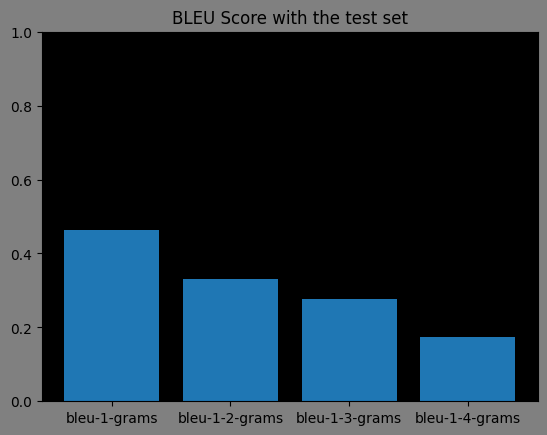

In [49]:

import matplotlib.pyplot as plt
plt.figure(facecolor='grey')

ax = plt.axes()
ax.set_facecolor("black")
from performance_metric import  bleu_score, calculate_ROUGE,get_cosine_val

bleu_test=bleu_score(acutal, predicted)
plt.bar(x = bleu_test.keys(), height = bleu_test.values())
plt.title("BLEU Score with the test set")
plt.ylim((0,1))
plt.show()

In [50]:
analytics_table.count()

Unnamed: 0    300
hindi         300
eng           300
gpt           300
dtype: int64

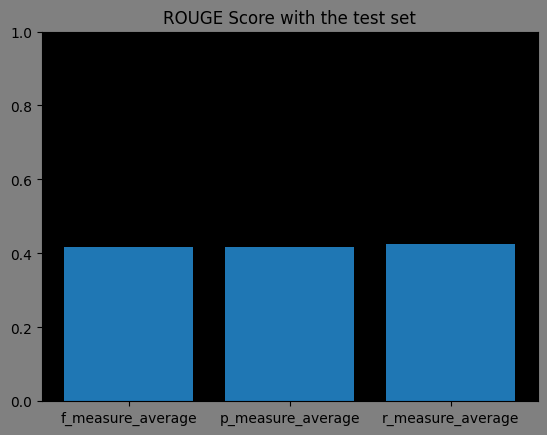

In [55]:
actual_rouge = map(lambda x: x.lower().split(),  analytics_table['eng'].values  ) 
actual_rouge=list(actual_rouge)
actual_rouge[0]
rouge_test = calculate_ROUGE(actual=actual_rouge, predicted=predicted)
rouge_test
plt.figure(facecolor='grey')
ax = plt.axes()
ax.set_facecolor("black")
plt.bar(x = rouge_test.keys(), height = rouge_test.values())
plt.title("ROUGE Score with the test set")
plt.ylim((0,1))
plt.show()

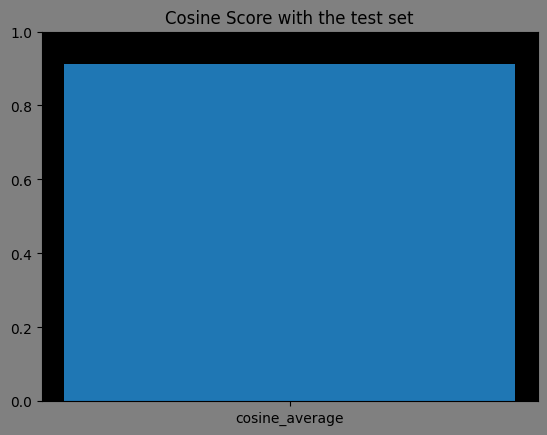

In [57]:
from statistics import mean

translation= (analytics_table['gpt'].values)[0]
raw_target= (analytics_table['eng'].values)[0]
cosine_value_list= []
for reference, candidate in zip(analytics_table['eng'], analytics_table['gpt']):
    cosine_value= get_cosine_val (translation,raw_target )
    cosine_value_list.append(cosine_value)
   
average_cosine= mean(cosine_value_list)

plt.figure(facecolor='grey')
ax = plt.axes()
ax.set_facecolor("black")
plt.bar(x = "cosine_average", height = average_cosine)
plt.title("Cosine Score with the test set")
plt.ylim((0,1))
plt.show()


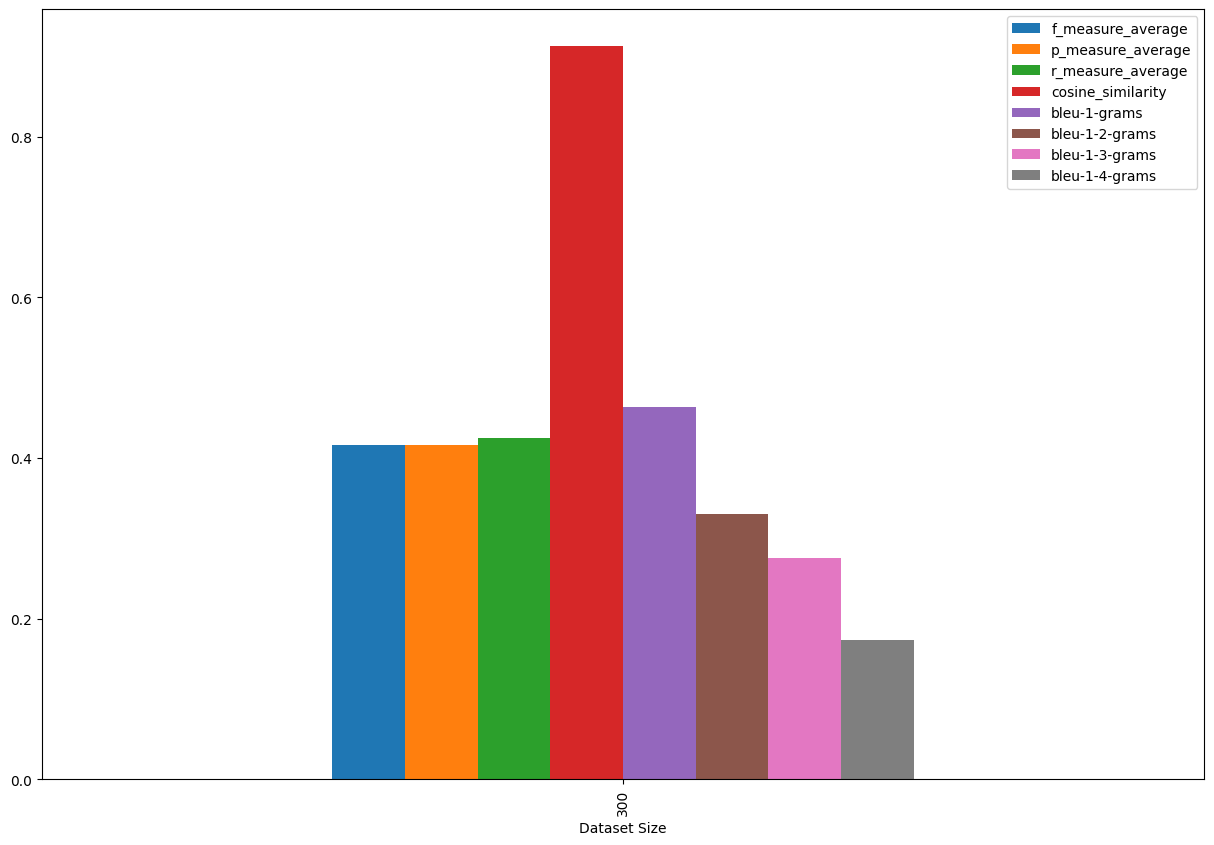

In [58]:
import matplotlib.pyplot as plot
from matplotlib.ticker import ScalarFormatter

#,figsize=(10,15)
keys=["Dataset Size", *rouge_test.keys(), "cosine_similarity", *bleu_test.keys()]
values=[total_sentences,  *rouge_test.values(), average_cosine, *bleu_test.values() ]
table =pd.DataFrame(columns=keys, data=[values])
table.plot.bar(x="Dataset Size",figsize=(15,10))
plot.show(block=True)


In [59]:
analytics_table

,Unnamed: 0,hindi,eng,gpt
0,0,आपकी कार में ब्लैक बॉक्स,a black box in your car,Black box in your car
1,6,अमेरिकी नागरिक स्वतंत्रता संघ भी विभिन्न प्रका...,the american civil liberties union is deeply c...,The American Civil Liberties Union is also ver...
2,10,यह हमारे देश के लिए वास्तव में अनिवार्य वस्तु है।,this really is a must for our nation,This is truly an essential item for our country.
3,12,हमारे द्वारा कर भुगतान किए जाने के तरीके में प...,there is going to be a change in how we pay th...,The modes of payment made by us are undergoing...
4,13,ऐसा करने के लिए प्रौद्योगिकी है।,the technology is there to do it,It is technology to do that.
...,...,...,...,...
295,1001,सुबह में लोग धूप का आनंद लेते भी नजर आए।,people were seen enjoying the sunshine in the ...,In the morning people also enjoy the warmth of...
296,1003,बच्चे भी स्वेटर पहन कर अपने स्कूल पहुंचे।,the children also went to school wearing sweaters,The children also wore sweaters to go to their...
297,1005,जबकि 78 मिलीमीटर बारिश दर्ज की गई।,78 millimetres of rainfall was recorded,While 78 millimeters of rain was recorded.
298,1006,मौसम विभाग के अनुसार आगे भी आसमान पर बादल छाए ...,according to the weather department the skies ...,"According to the Meteorological Department, cl..."


In [61]:
analytics_table['gpt']

0                                  Black box in your car
1      The American Civil Liberties Union is also ver...
2       This is truly an essential item for our country.
3      The modes of payment made by us are undergoing...
4                           It is technology to do that.
                             ...                        
295    In the morning people also enjoy the warmth of...
296    The children also wore sweaters to go to their...
297           While 78 millimeters of rain was recorded.
298    According to the Meteorological Department, cl...
299    The big orders of jet manufacturers are at sta...
Name: gpt, Length: 300, dtype: object